# K-means Algorithm

In [ ]:
#importing packages

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
# importing data and make an object of it

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
# perform clustering

In [4]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

In [ ]:
# plotting

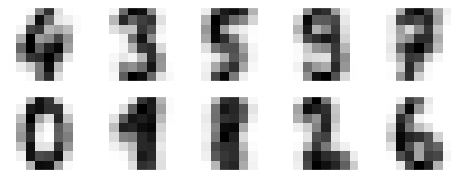

In [5]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
   axi.set(xticks=[], yticks=[])
   axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [ ]:
# matching the learned cluster labels with true labels

In [6]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
   mask = (clusters == i)
   labels[mask] = mode(digits.target[mask])[0]

In [ ]:
# check accuracy

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

# Mean Shift Algorithm

In [ ]:
# importing packages

In [10]:
%matplotlib inline
import numpy as np
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

In [ ]:
# creating samples to make blobs

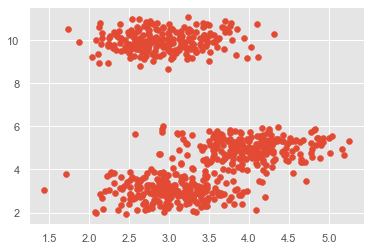

In [11]:
from sklearn.datasets import make_blobs
centers = [[3,3,3],[4,5,5],[3,10,10]]
X, _ = make_blobs(n_samples = 700, centers = centers, cluster_std = 0.5)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [ ]:
# implementing mean shift clustering and printing cluster centers

In [12]:
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Estimated clusters:", n_clusters_)

[[ 3.01526823  2.98819471  2.96347785]
 [ 2.94895684  9.96539974 10.03774169]
 [ 4.00600173  4.98653185  5.0285558 ]]
Estimated clusters: 3


In [ ]:
# plotting

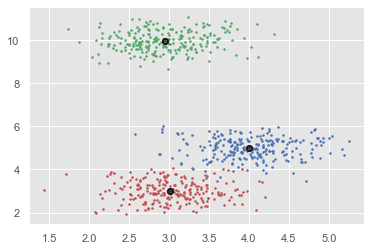

In [13]:
colors = 10*['r.','g.','b.','c.','k.','y.','m.']
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 3)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
    marker=".",color='k', s=20, linewidths = 5, zorder=10)
plt.show()

# Hierarchical Clustering

In [ ]:
# importing packages

In [ ]:
# importing dataset

In [39]:
from pandas import read_csv
path = r"D:\pima-indians-diabetes.csv"
headernames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(path, names=headernames)

In [ ]:
# arranging data

In [40]:
array = data.values
X = array[:,0:8]
Y = array[:,8]
data.shape
(768, 9)
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# plotting dendogram

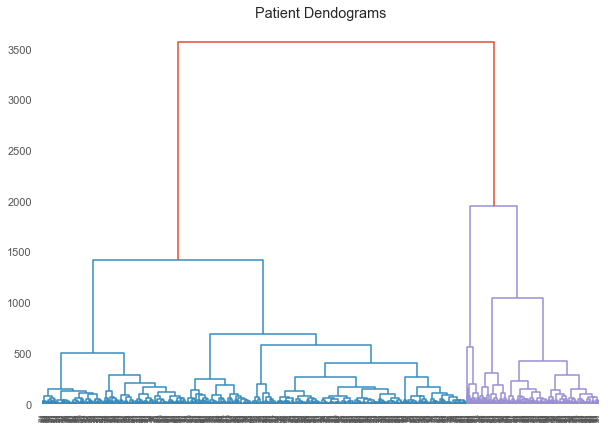

In [41]:
patient_data = data.iloc[:, 3:5].values
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Patient Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [ ]:
# plotting hierarchical clusters

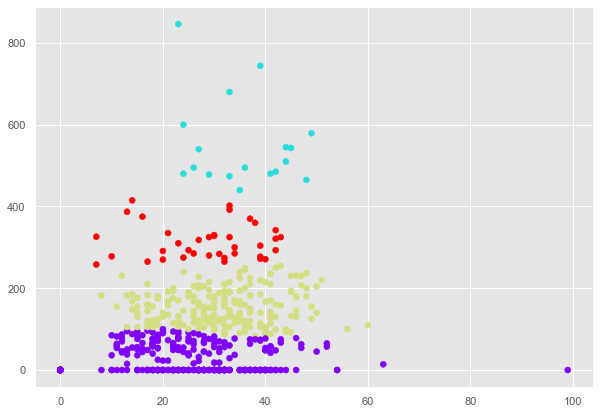

In [42]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(patient_data)
plt.figure(figsize=(10, 7))
plt.scatter(patient_data[:,0], patient_data[:,1], c=cluster.labels_, cmap='rainbow')